# Import Core Libraries

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

from os import listdir, walk
from os.path import isfile, join

# Load Dataset

In [400]:
%run load_dataset.ipynb

Loading 1001's data
Loading 1002's data
Loading 1003's data
Loading 1004's data
Loading 1005's data
Loading 1006's data
Loading 1007's data
Loading 1008's data
Loading 1009's data
Loading 1010's data
Loading 1011's data
Loading 1012's data
Loading 2001's data
Loading 2002's data
Finished loading


# Data Preprocessing

In [3]:
%run preprocess_for_SVM.ipynb
# includes wavelet denoising, normalization, PCA, LDA, SVD, etc.

In [402]:
print(X_all.shape, y_all.shape)

(27949, 3) (27949,)


# Group Data by Label and Normalize Data

In [403]:
print(label_list)
print(label_dict)

['sit', 'sleep', 'stand', 'walk']
{'sit': 0, 'sleep': 1, 'stand': 2, 'walk': 3}


In [6]:
# denoise the signal using wavelet transform
# wavelet_output = wavelet_smooth(X_all)
# X_w = np.array(wavelet_output)

In [405]:
new_label_list = [0,1,2,3]
new_label_dict = {
    0: 'sit',
    1: 'sleep',
    2: 'stand',
    3: 'walk'
}

colors = ['r','g','b','navy','turquoise','darkorange']

In [8]:
# group X_all and y_all from load_dataset.ipynb by labels
X_label, y_label = label_grouping(X_all, y_all, subj_all, new_label_list)

# normalize X_label
X_norm = normalize_data(X_label)

## Show Plot for each Activity and Subject

plotting  sit


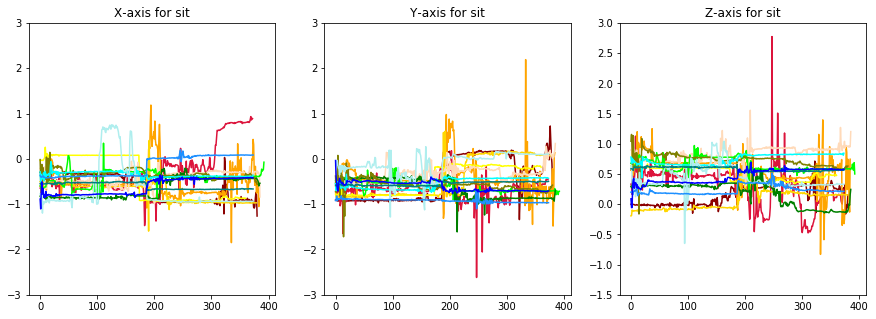

plotting  sleep


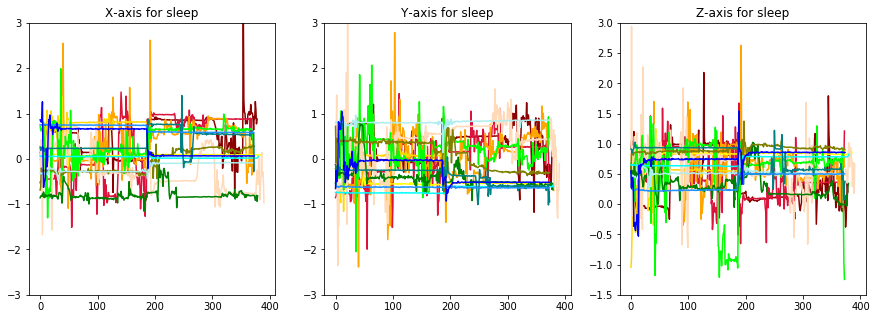

plotting  stand


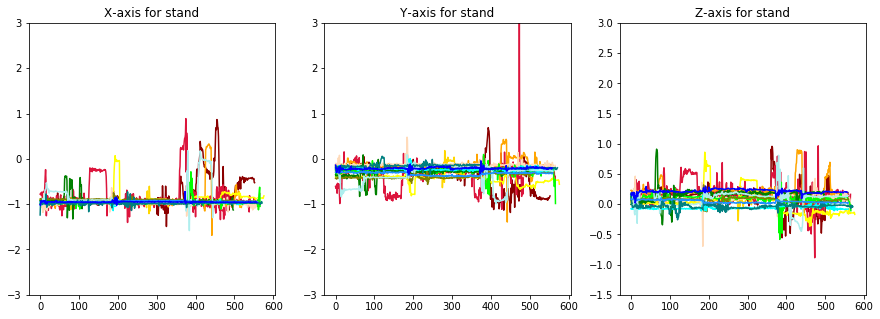

plotting  walk


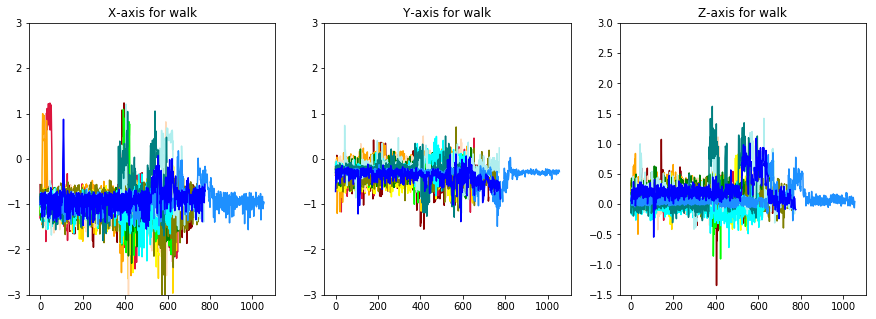

In [407]:
plot_all_label(X_label, y_all, new_label_list, new_label_dict)

# Calculate Roll, Pitch, Yaw

In [408]:
roll, pitch, yaw = calc_rpy(X_all, subject_id, colors)
rpy = np.array([roll, pitch, yaw]).transpose()

print(rpy.shape)

(27949, 3)


# Apply PCA and LDA

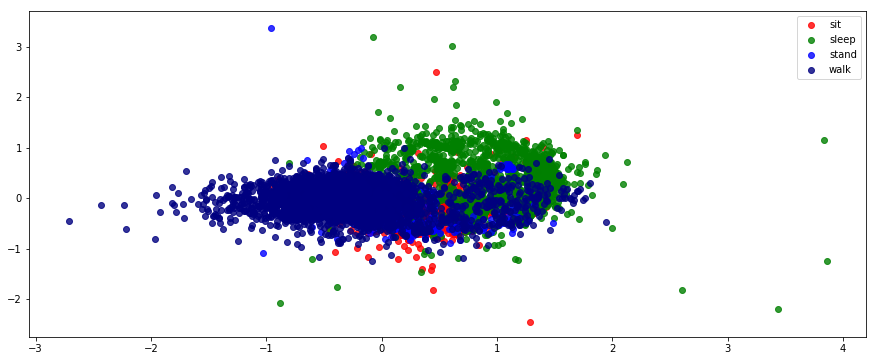

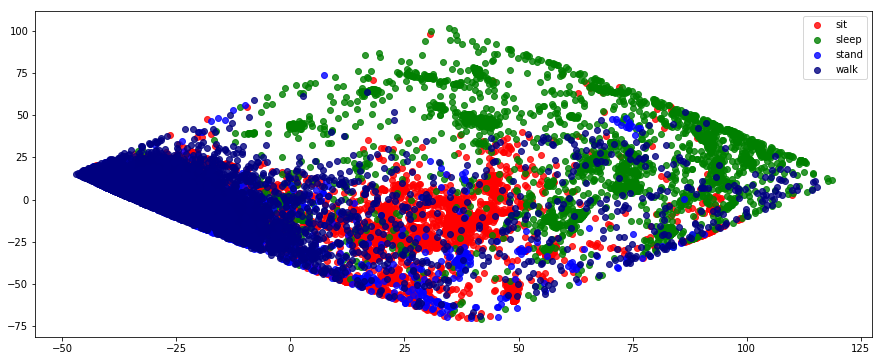

In [409]:
# apply PCA and LDA to X_norm and rpy
X_pca = apply_pca(X_all, y_all, label_list)
rpy_pca = apply_pca(rpy, y_all, label_list)

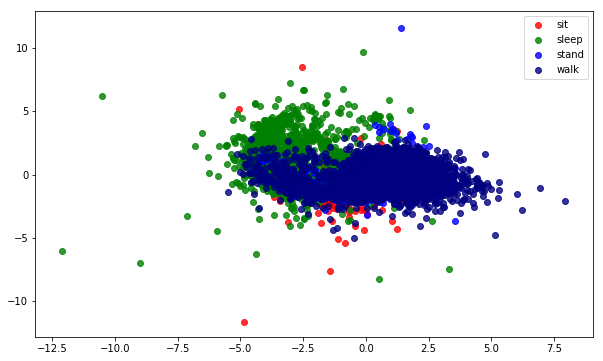

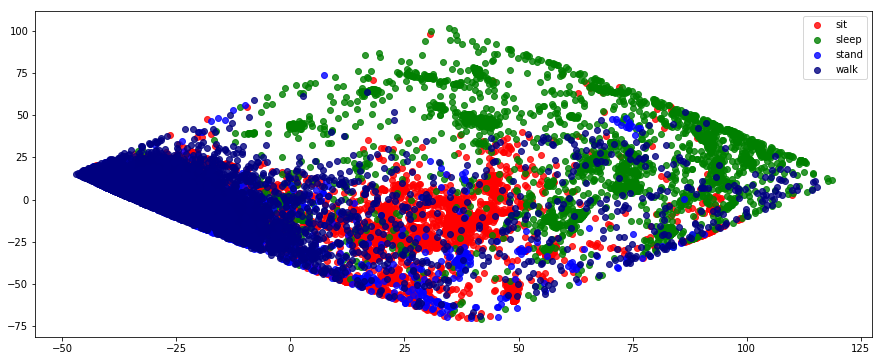

In [410]:
X_lda = apply_lda(X_all, y_all, label_list)
rpy_lda = apply_pca(rpy, y_all, label_list)

# Reshape Data (Pure Label)

In [13]:
# get label-separated X and y
X_svm, y_svm = prepare_pure_label(X_pca, y_all, subj_all, new_label_list)
y_svm = y_svm.reshape((y_svm.shape[0],))

In [412]:
print(X_svm.shape, y_svm.shape)

(24645, 180) (24645,)


# Reshape Data (Impure Label)

In [15]:
X_impure, y_impure = prepare_impure_label(X_pca, y_all)

In [414]:
print(X_impure.shape, y_impure.shape)

(27890, 180) (27890,)


# Split Train and Test Set

In [415]:
# Split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.3, random_state=42)

X_tr, X_te, y_tr, y_te = train_test_split(X_impure, y_impure, test_size=0.3, random_state=42)

print(X_tr.shape)
print(X_te.shape)

(19523, 180)
(8367, 180)


In [507]:
print(X_train.shape)
print(X_test.shape)

(17251, 180)
(7394, 180)


# SVM

In [480]:
svm_model = svm_classifier(X_train, y_train)
print("Finished training")

Finished training


In [19]:
y_pred_svm = svm_model.predict(X_test)

In [509]:
svm_model_2 = svm_classifier(X_tr, y_tr)
print("Finished training")

Finished training


## SVM Evaluation

In [20]:
%run eval_score.ipynb

In [21]:
LABELS = ['sit','sleep','stand','walk']

0.868542061131


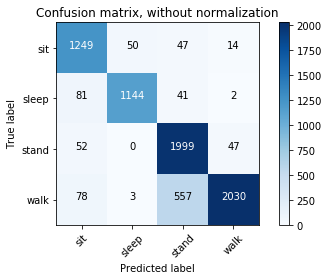

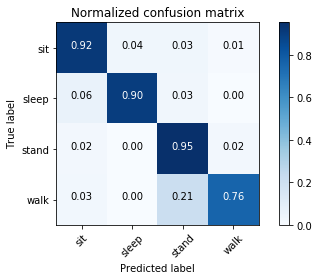

             precision    recall  f1-score   support

        sit       0.86      0.92      0.89      1360
      sleep       0.96      0.90      0.93      1268
      stand       0.76      0.95      0.84      2098
       walk       0.97      0.76      0.85      2668

avg / total       0.89      0.87      0.87      7394



In [484]:
acc = accuracy_score(y_test, y_pred_svm)
print(acc)

show_conf_matrix(y_test, y_pred_svm, LABELS)
show_clf_report(y_test, y_pred_svm, LABELS)

# K-NN

In [421]:
nn_model = nn_classifier(X_train, y_train)
print("Finished training")

Finished training


In [24]:
y_pred_nn = nn_model.predict(X_test)

## K-NN Evaluation

0.826075196105


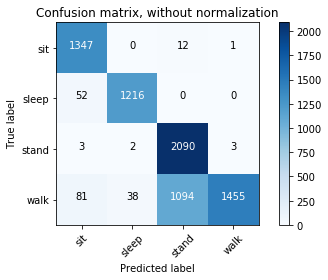

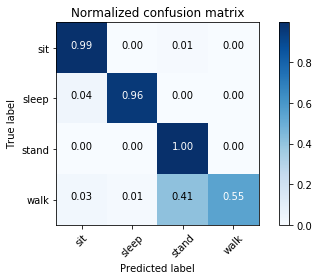

             precision    recall  f1-score   support

        sit       0.91      0.99      0.95      1360
      sleep       0.97      0.96      0.96      1268
      stand       0.65      1.00      0.79      2098
       walk       1.00      0.55      0.71      2668

avg / total       0.88      0.83      0.82      7394



In [423]:
acc = accuracy_score(y_test, y_pred_nn)
print(acc)

show_conf_matrix(y_test, y_pred_nn, LABELS)
show_clf_report(y_test, y_pred_nn, LABELS)

# Walk Algorithm

In [31]:
%run classifier_alg.ipynb

In [32]:
# classify walking
walk = calc_walk(X_all)
walk_its = intersection_walk(walk)
walk_pred_p = calc_walk_periods(walk_its)

walk_exact_p = get_exact_walk(y_all)
    
walk_pred = binarize_walk_prd(walk_pred_p, y_all)
walk_exact = binarize_walk_prd(walk_exact_p, y_all)

## Walk Algorithm Evaluation

0.9217503309599628


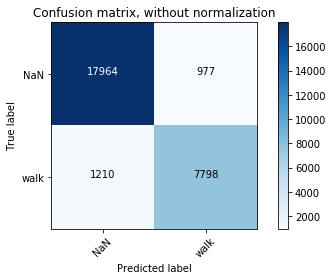

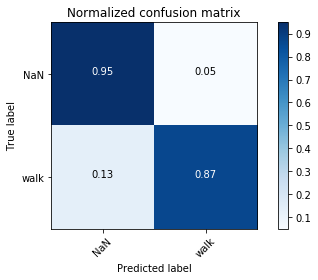

              precision    recall  f1-score   support

         NaN       0.94      0.95      0.94     18941
        walk       0.89      0.87      0.88      9008

   micro avg       0.92      0.92      0.92     27949
   macro avg       0.91      0.91      0.91     27949
weighted avg       0.92      0.92      0.92     27949



In [33]:
walk_lbl = ['NaN','walk']

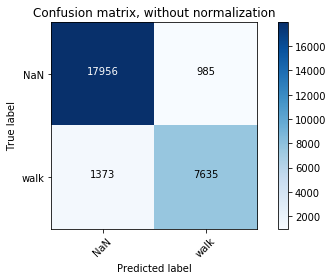

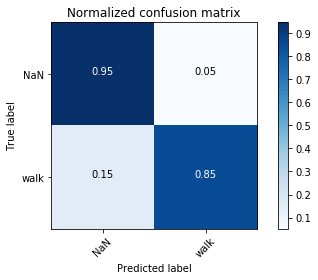

             precision    recall  f1-score   support

        NaN       0.93      0.95      0.94     18941
       walk       0.89      0.85      0.87      9008

avg / total       0.92      0.92      0.92     27949



In [35]:
show_conf_matrix(walk_exact, walk_pred, walk_lbl)
show_clf_report(walk_exact, walk_pred, walk_lbl)

# Combine SVM and Walk Algorithm

In [36]:
X_walk = [X_all[i] for i in range(len(walk_pred)) if walk_pred[i]==1]
X_non_walk = [X_all[i] for i in range(len(walk_pred)) if walk_pred[i]==0]

X_walk = np.array(X_walk)
X_non_walk = np.array(X_non_walk)

y_walk = [y_all[i] for i in range(len(walk_pred)) if walk_pred[i]==1]
y_non_walk = [y_all[i] for i in range(len(walk_pred)) if walk_pred[i]==0]

y_walk = np.array(y_walk)
y_non_walk = np.array(y_non_walk)

In [37]:
print(X_walk.shape, X_non_walk.shape)
print(y_walk.shape, y_non_walk.shape)

(8620, 3) (19329, 3)
(8620,) (19329,)


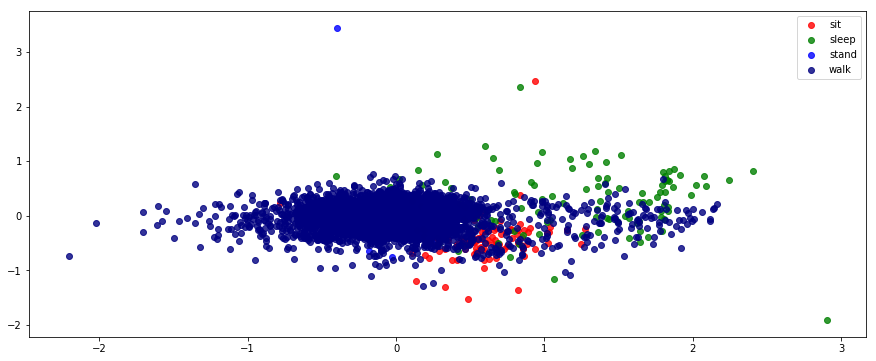

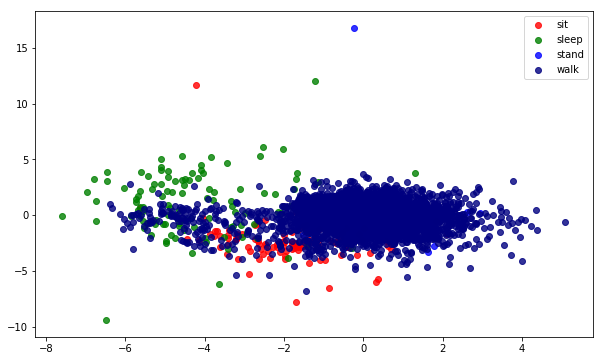

In [38]:
Xw_pca = apply_pca(X_walk, y_walk, label_list)
Xw_lda = apply_lda(X_walk, y_walk, label_list)

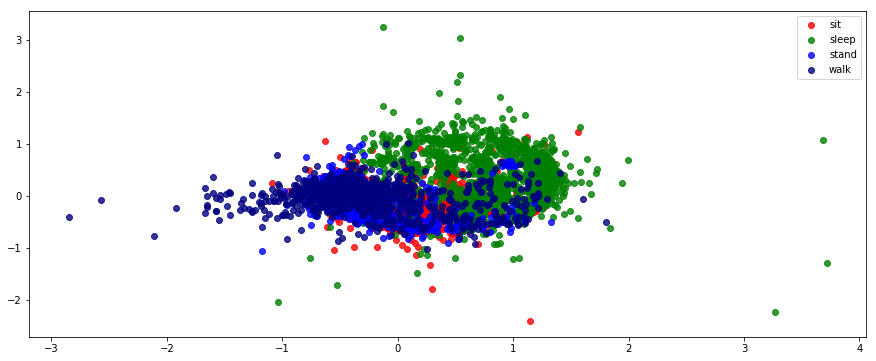

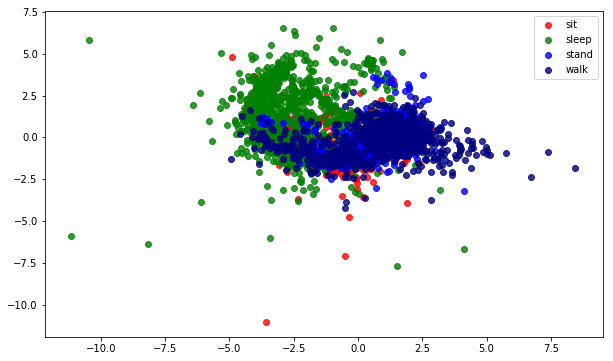

In [39]:
Xnw_pca = apply_pca(X_non_walk, y_non_walk, label_list)
Xnw_lda = apply_lda(X_non_walk, y_non_walk, label_list)

In [40]:
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw_lda, y_walk, test_size=0.3, random_state=42)

Xnw_train, Xnw_test, ynw_train, ynw_test = train_test_split(Xnw_lda, y_non_walk, test_size=0.3, random_state=42)

In [41]:
svm_walk = svm_classifier(Xw_train, yw_train)
print("Finish Training")

Finish Training


In [42]:
svm_non_walk = svm_classifier(Xnw_train, ynw_train)
print("Finish Training")

Finish Training


In [43]:
yw_pred = svm_walk.predict(Xw_test)
ynw_pred = svm_non_walk.predict(Xnw_test)

### SVM only walk

0.966744006187


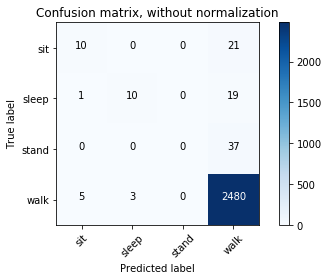

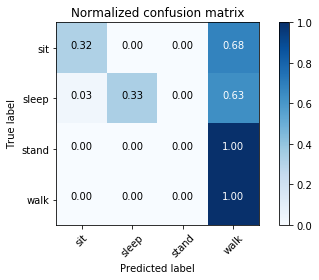

             precision    recall  f1-score   support

        sit       0.62      0.32      0.43        31
      sleep       0.77      0.33      0.47        30
      stand       0.00      0.00      0.00        37
       walk       0.97      1.00      0.98      2488

avg / total       0.95      0.97      0.96      2586



C:\Users\fifamd\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
acc = accuracy_score(yw_test, yw_pred)
print(acc)

show_conf_matrix(yw_test, yw_pred, LABELS)
show_clf_report(yw_test, yw_pred, LABELS)

## SVM non walk

0.869115364718


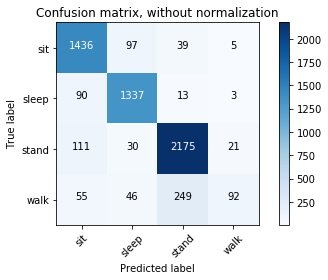

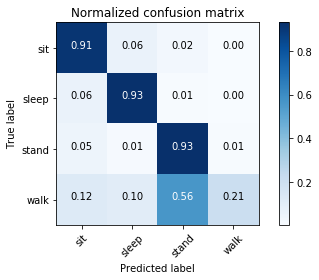

             precision    recall  f1-score   support

        sit       0.85      0.91      0.88      1577
      sleep       0.89      0.93      0.91      1443
      stand       0.88      0.93      0.90      2337
       walk       0.76      0.21      0.33       442

avg / total       0.86      0.87      0.85      5799



In [45]:
acc = accuracy_score(y_te, y_pred_new)
print(acc)

show_conf_matrix(y_te, y_pred_new, LABELS)
show_clf_report(y_te, y_pred_new, LABELS)

# Test Model with Some Subject

In [46]:
test_subj = '2001'
filepath = 'DDC_Data/' + test_subj + '/' + test_subj + '-log_acc.csv'

df_test = pd.read_csv(filepath, header=None, names=['x','y','z','timestamp'])

In [47]:
ts_list = []
g = 9.8

for i in range(len(df_test)):
    X_i = [df_test.loc[i]['x']/g, df_test.loc[i]['y']/g, df_test.loc[i]['z']/g]
    ts_list.append(df_test.loc[i]['timestamp'])
    
    if(i==0):
        X_visua = X_i
    else:
        X_visua = np.vstack((X_visua, X_i))

ts_list = np.array(ts_list)

In [48]:
n_comp = 3

pca = PCA(n_components=n_comp)
pca = pca.fit(X_all)
X_vis_pca = pca.transform(X_visua)

In [49]:
X_vis_imp, ts_list_imp = prepare_impure_label(X_vis_pca, ts_list)

In [50]:
y_t_pred2 = combine(X_vis_imp, y_t_pred_2)

In [51]:
y_dict = {}
y_dict['timestamp'] = ts_list_imp
y_dict['y_pred'] = y_t_pred

df_y = pd.DataFrame(y_dict)

df_y['y_pred'].value_counts()

3    1334
0    1199
2    1187
1     750
Name: y_pred, dtype: int64

In [512]:
y_dict = {}
y_dict['timestamp'] = ts_list_imp
y_dict['y_pred'] = y_t_pred2

df_y2 = pd.DataFrame(y_dict)

df_y2['y_pred'].value_counts()

2    8025
1    4362
0    3697
3    3333
Name: y_pred, dtype: int64

# Get the Actual Timestamp Labels

In [52]:
timer_path = 'DDC_Data/' + test_subj + '/' + test_subj + '-iphone-history_amdtimer 6.csv'

cols = ['sid', 'timestamp', 'duration', 'label']
df_timer = pd.read_csv(timer_path, header=None, names=['sid','label','timestamp', 'duration'])
sid_list = np.array(list(df_timer['sid']))

tf = list(map(lambda x: x==int(test_subj), sid_list))
df_sid = df_timer[tf]
df_sid = df_sid.reset_index(drop=True)

# Group a Sequence into Periods by Labels

In [53]:
label_period = []
period_list = [[] for i in range(len(LABELS))]

first = 0
keep = 0

for i in range(len(df_y)):
    if(calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])>=calc_sec(df_sid.loc[0]['timestamp'].split(' ')[1]) and
       calc_sec(df_y.loc[i]['timestamp'].split(' ')[1])<=calc_sec(df_sid.loc[len(df_sid)-1]['timestamp'].split(' ')[1])):
        
        keep_lb = df_y.loc[keep]['y_pred']

        if(keep_lb!=df_y.loc[i]['y_pred']):
            if(keep!=0):
                label_period.append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp'], 
                                     df_y.loc[i-1]['y_pred']])

                period_list[df_y.loc[i-1]['y_pred']].append([df_y.loc[keep]['timestamp'], df_y.loc[i-1]['timestamp']])

            keep = i

# Display Table

In [56]:
from prettytable import PrettyTable

ModuleNotFoundError: No module named 'prettytable'

In [ ]:
labels_list = ['sit', 'sleep', 'stand', 'walk']
headers = ['start', 'end', 'label']

t = PrettyTable(headers)

for row in label_period:
#     if(calc_sec(row[1].split(' ')[1])-calc_sec(row[0].split(' ')[1])>1):
        t.add_row([row[0], row[1], labels_list[row[2]]])

In [521]:
print(t)

+-------------------------+-------------------------+-------+
|          start          |           end           | label |
+-------------------------+-------------------------+-------+
| 2019-01-16 13:58:47.956 | 2019-01-16 13:59:28.755 | stand |
| 2019-01-16 13:59:28.915 | 2019-01-16 14:00:02.809 |  sit  |
| 2019-01-16 14:00:02.969 | 2019-01-16 14:00:43.923 | stand |
| 2019-01-16 14:00:44.115 | 2019-01-16 14:00:44.115 |  walk |
| 2019-01-16 14:00:44.245 | 2019-01-16 14:00:49.062 | stand |
| 2019-01-16 14:00:49.222 | 2019-01-16 14:00:49.222 |  walk |
| 2019-01-16 14:00:49.383 | 2019-01-16 14:00:49.545 | stand |
| 2019-01-16 14:00:49.705 | 2019-01-16 14:00:51.312 |  walk |
| 2019-01-16 14:00:51.473 | 2019-01-16 14:00:51.793 | stand |
| 2019-01-16 14:00:51.953 | 2019-01-16 14:00:52.596 |  walk |
| 2019-01-16 14:00:52.757 | 2019-01-16 14:00:53.723 | stand |
|  2019-01-16 14:00:53.88 |  2019-01-16 14:00:53.88 |  walk |
| 2019-01-16 14:00:54.043 | 2019-01-16 14:00:55.005 | stand |
| 2019-0

In [ ]:
df_sid[cols]

# Predicted Duration

In [ ]:
total_secs = []
for i in range(len(period_list)):    
    secs = 0
    for p_i in period_list[i]:
        sec = calc_sec(p_i[1].split(' ')[1]) - calc_sec(p_i[0].split(' ')[1])
        secs += sec
    
    secs = round(secs, 3)
    total_secs.append(secs)
    
percent_secs = [round(t/np.sum(total_secs)*100, 3) for t in total_secs]

tb = PrettyTable(['Label', 'Seconds', 'Percentage'])

for i in range(len(LABELS)):
    tb.add_row([labels_list[i], total_secs[i], percent_secs[i]])

tb.add_row(['', '', ''])
tb.add_row(['total', round(np.sum(total_secs), 3), round(np.sum(percent_secs), 3)])

In [ ]:
print(tb)

# Actual Duration

In [ ]:
df_lb = df_sid.groupby('label')
old_labels_list = ['sit', 'sleep', 'downstairs', 'upstairs', 'stand', 'walk']

dura_dict = {}
for lb in labels_list:
    dura_dict[lb] = 0

idx = list(df_sid.index)
for i in range(len(old_labels_list)):
    lb = old_labels_list[i]
    df_temp = df_lb.get_group(lb)
    df_temp = df_temp.reset_index(drop=True)
        
    if(lb=='downstairs' or lb=='upstairs'):
        lb = 'walk'
    
    for j in range(len(df_temp)):
        dura_dict[lb] += calc_sec(df_temp.loc[j]['duration'])

total_dura = np.sum([dura_dict[lb] for lb in labels_list])

percent_list = []
        
tabl = PrettyTable(['Label', 'Seconds', 'Percentage'])
for lb in labels_list:
    percent = round(dura_dict[lb]/total_dura*100, 3)
    tabl.add_row([lb, dura_dict[lb], round(dura_dict[lb]/total_dura*100, 3)])
    
    percent_list.append(percent)
    
tabl.add_row(['', '', ''])    
tabl.add_row(['total', round(total_dura, 3), np.sum(percent_list)])

In [ ]:
print(tabl)

In [ ]:
s_idx = 0
f_idx = 1
lb_idx = 2

## Separate Each 5 Minutes

In [473]:
fivemin = 60*5
new_label_period = []

start_time = calc_sec(label_period[0][s_idx].split(' ')[1])
finish_time = calc_sec(label_period[-1][f_idx].split(' ')[1])

floor_start = start_time - (start_time%fivemin)
ceil_finish = finish_time - (finish_time%fivemin) + fivemin

print(calc_ts(floor_start), calc_ts(ceil_finish))

tm_s = floor_start
tm_f = floor_start + fivemin
date = label_period[0][s_idx].split(' ')[0]

for prd in label_period:
    if(calc_sec(prd[f_idx].split(' ')[1])>=tm_f):
        new_prd = [prd[s_idx], date + ' ' + calc_ts(tm_f), prd[lb_idx]]
        new_label_period.append(new_prd)
        
        tm_s += fivemin
        tm_f += fivemin
    else:
        new_label_period.append(prd)
                
    if(calc_sec(prd[s_idx].split(' ')[1])<tm_s):
        new_prd = [date + ' ' + calc_ts(tm_s), prd[f_idx], prd[lb_idx]]
        new_label_period.append(new_prd)

13:55:0.0 14:10:0.0


In [474]:
all_periods_label = []

for t_i in range(int(floor_start), int(ceil_finish), t_5min):
    period_lb = [0 for i in range(len(LABELS))]
    for prd in new_label_period:
        if(calc_sec(prd[s_idx].split(' ')[1])>=t_i and calc_sec(prd[f_idx].split(' ')[1])<=t_i+t_5min):
            period_lb[prd[lb_idx]] += calc_sec(prd[f_idx].split(' ')[1])-calc_sec(prd[s_idx].split(' ')[1])
            period_lb[prd[lb_idx]] = round(period_lb[prd[lb_idx]], 3)
            
    all_periods_label.append(period_lb)

In [475]:
df_all = pd.DataFrame(all_periods_label, columns=labels_list)

df_all

,sit,sleep,stand,walk
0,32.531,0.00,39.353,0.000
1,74.132,81.29,122.382,15.425
2,25.904,0.00,187.641,35.517


## Plot Bar Graph

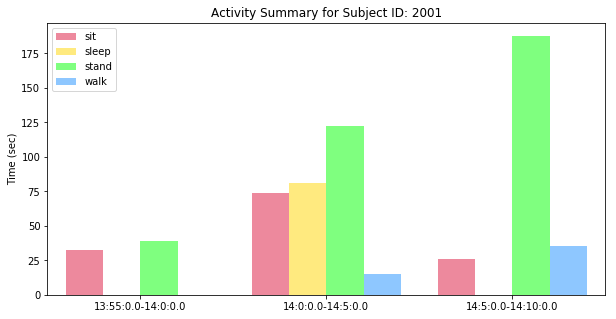

In [476]:
pos = list(range(len(df_all['sit'])))
width = 0.2
colors = ['crimson','gold','lime','dodgerblue']

fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(LABELS)):
    plt.bar([p + i*width for p in pos],
            df_all[labels_list[i]],
            width,
            alpha=0.5,
            color=colors[i],
            label=labels_list[i])
    
ax.set_xticks([p + 1.5 * width for p in pos])

xtick_labels = [calc_ts(floor_start + i*fivemin) + '-' + calc_ts(floor_start + (i+1)*fivemin)
                for i in range(len(df_all))]
ax.set_xticklabels(xtick_labels)

ax.set_ylabel('Time (sec)')

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.legend(loc='upper left')
plt.title('Activity Summary for Subject ID: ' + test_subj)

plt.show()

In [479]:
print('Prediction')
print (tb)
print('Actual')
print (tabl)

Prediction
+-------+---------+------------+
| Label | Seconds | Percentage |
+-------+---------+------------+
|  sit  | 132.567 |   21.557   |
| sleep |  81.29  |   13.219   |
| stand | 349.376 |   56.813   |
|  walk |  51.727 |   8.411    |
|       |         |            |
| total |  614.96 |   100.0    |
+-------+---------+------------+
Actual
+-------+---------+------------+
| Label | Seconds | Percentage |
+-------+---------+------------+
|  sit  |   60.0  |   14.563   |
| sleep |   60.0  |   14.563   |
| stand |   90.0  |   21.845   |
|  walk |  202.0  |   49.029   |
|       |         |            |
| total |  412.0  |   100.0    |
+-------+---------+------------+
